# EDA — Iris (sklearn)

Generated notebook with a structured Exploratory Data Analysis (EDA).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Categorical.from_codes(data.target, data.target_names)


## Quick peek

In [3]:
print('Shape:', df.shape)
df.head()

Shape: (150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Info and summary statistics

In [4]:
print('\nInfo:')
df.info()

print('\nDescribe:')
df.describe(include='all')



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   target             150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB

Describe:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


## Missing values and basic cleaning suggestions

In [5]:
missing = df.isnull().sum().sort_values(ascending=False)
display(missing[missing>0])

print('\nPercentage missing:')
display((df.isnull().mean()*100).sort_values(ascending=False).head(10))


Series([], dtype: int64)


Percentage missing:


sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
target               0.0
dtype: float64

## Univariate analysis (distributions)

Numeric columns: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Categorical columns: ['target']


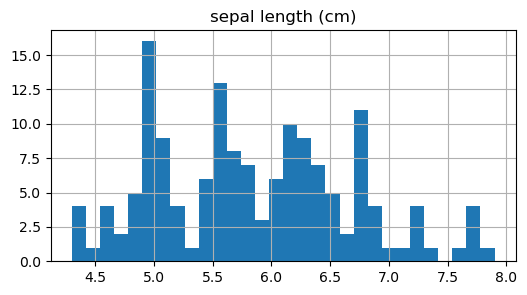

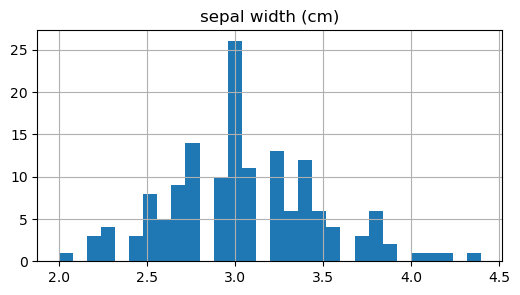

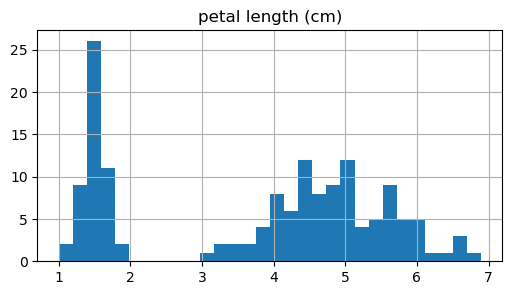

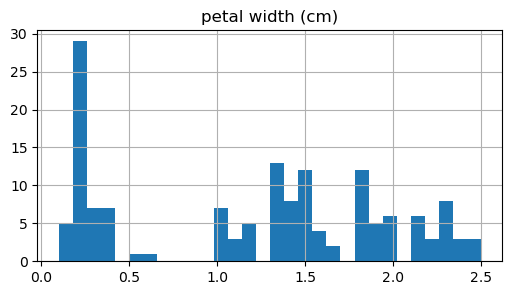

target
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Figure size 600x300 with 0 Axes>

In [6]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category','bool']).columns.tolist()
print('Numeric columns:', numeric_cols)
print('Categorical columns:', cat_cols)

for col in numeric_cols:
    try:
        plt.figure(figsize=(6,3))
        df[col].hist(bins=30)
        plt.title(col)
        plt.show()
    except Exception as e:
        print('Could not plot', col, e)

for col in cat_cols:
    try:
        plt.figure(figsize=(6,3))
        display(df[col].value_counts().head(15))
    except Exception as e:
        print('Could not show counts for', col, e)


## Bivariate analysis (pairs / boxplots / groupby)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


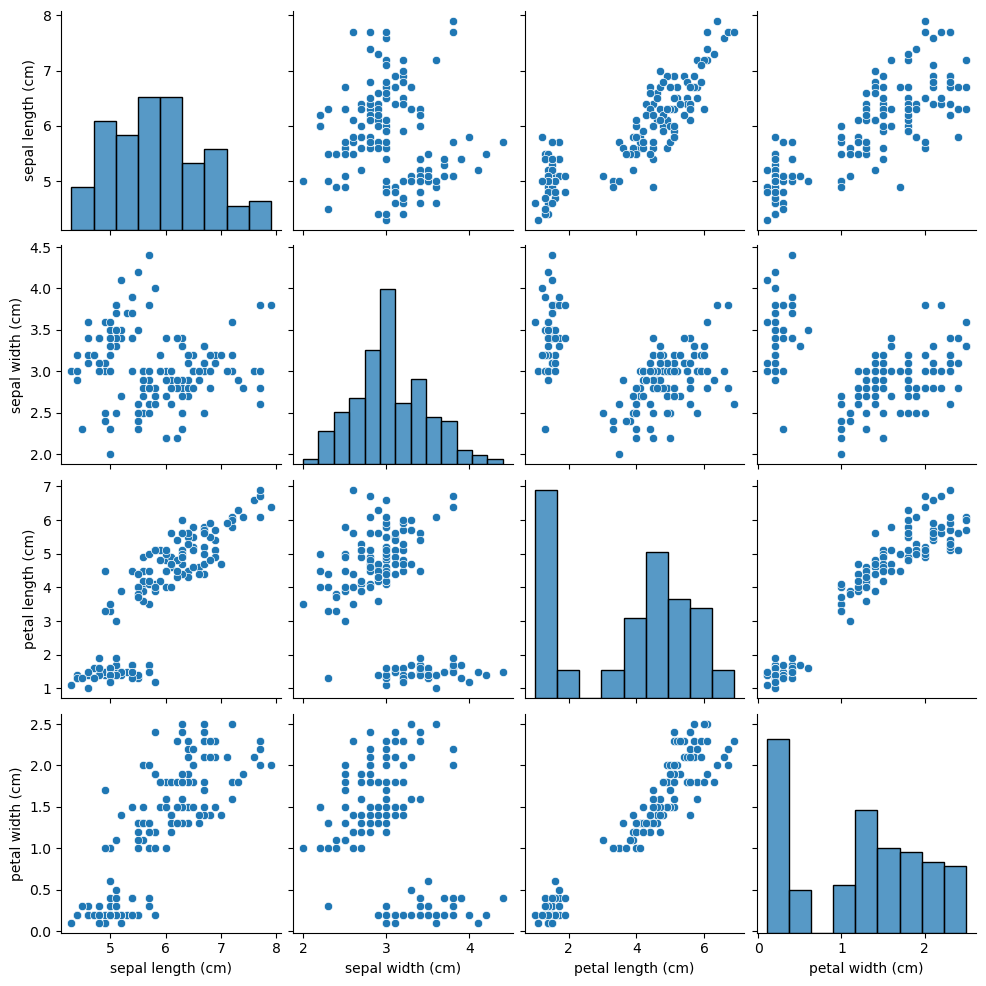

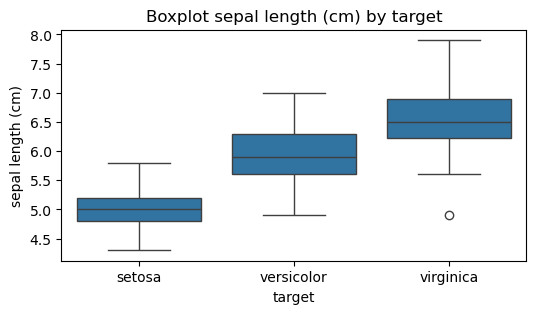

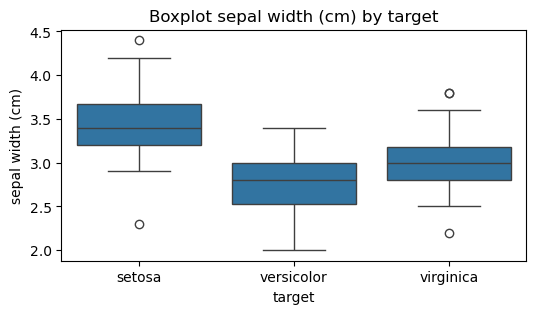

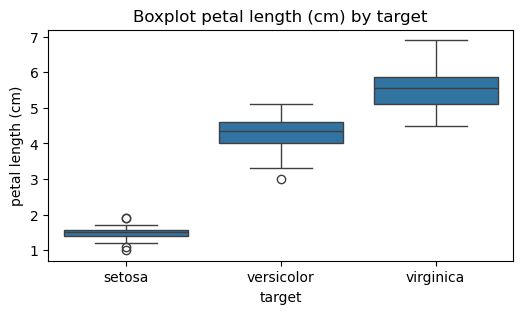

In [7]:
if len(numeric_cols) >= 2:
    try:
        display(df[numeric_cols].corr())
        sns.pairplot(df[numeric_cols].dropna().sample(min(500, len(df))))
    except Exception as e:
        print('Pairplot error:', e)

if len(cat_cols) > 0 and len(numeric_cols)>0:
    for c in cat_cols[:3]:
        for n in numeric_cols[:3]:
            try:
                plt.figure(figsize=(6,3))
                sns.boxplot(x=c, y=n, data=df)
                plt.title(f'Boxplot {n} by {c}')
                
                plt.show()
            except Exception as e:
                print('Boxplot error for', c, n, e)


## Correlation heatmap (numeric features)

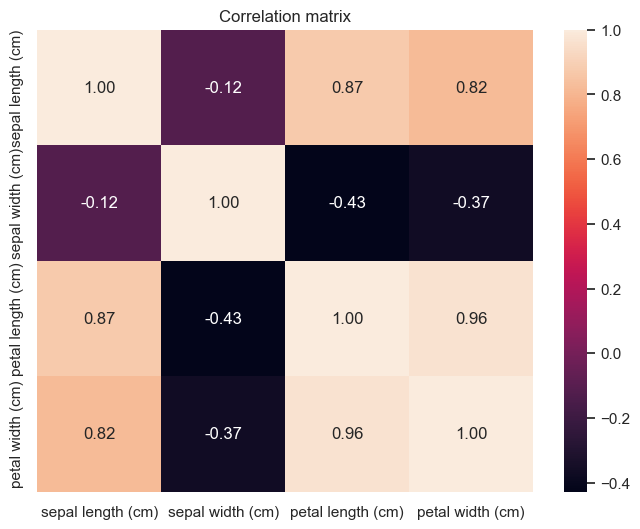

In [9]:
if len(numeric_cols)>0:
    try:
        plt.figure(figsize=(8,6))
        sns.heatmap(df[numeric_cols].corr(), annot=True, fmt='.2f')
        plt.title('Correlation matrix')
        plt.show()
    except Exception as e:
        print('Heatmap error:', e)


## Target column: `target` analysis

target
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

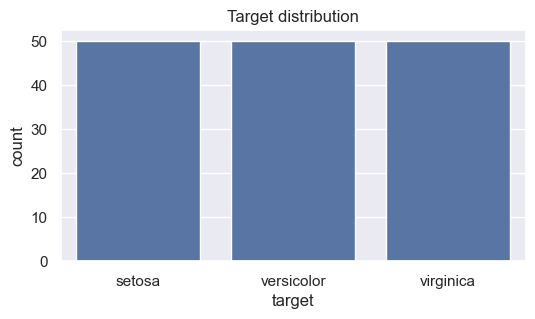

In [10]:
if 'target' in df.columns:
    display(df['target'].value_counts(dropna=False))
    try:
        plt.figure(figsize=(6,3))
        sns.countplot(x=df['target'])
        plt.title('Target distribution')
        plt.show()
    except Exception as e:
        print('Target plot error:', e)


## Summary & next steps

- Summarize obvious issues (missing data, outliers, needed encodings).
- Suggest simple preprocessing: imputation, encoding categorical variables, scaling numeric features.
